In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
ttc = pd.read_csv('./datasets/titanic/train.csv')

In [3]:
ttc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
ttc.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic = ttc[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']].copy()

In [10]:
titanic_nulls = titanic.isnull().sum().to_frame('nulls')
titanic_nulls[titanic_nulls["nulls"]> 0]

,nulls
Age,177
Cabin,687
Embarked,2


In [11]:
titanic.Sex=titanic.Sex.replace({"male":0, "female":1})

In [12]:
titanic.Age.fillna(titanic.Age.mean(), inplace = True)

In [13]:
titanic.Embarked=titanic.Embarked.fillna("S")

In [14]:
titanic=titanic.drop("Cabin", axis=1)

In [15]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,S
1,1,1,1,38.000000,1,0,71.2833,C
2,1,3,1,26.000000,0,0,7.9250,S
3,1,1,1,35.000000,1,0,53.1000,S
4,0,3,0,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,S
887,1,1,1,19.000000,0,0,30.0000,S
888,0,3,1,29.699118,1,2,23.4500,S
889,1,1,0,26.000000,0,0,30.0000,C


In [16]:
titanic.Embarked=titanic.Embarked.replace({"S":0, "C":1, "Q":2})

In [17]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,0
1,1,1,1,38.000000,1,0,71.2833,1
2,1,3,1,26.000000,0,0,7.9250,0
3,1,1,1,35.000000,1,0,53.1000,0
4,0,3,0,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0
887,1,1,1,19.000000,0,0,30.0000,0
888,0,3,1,29.699118,1,2,23.4500,0
889,1,1,0,26.000000,0,0,30.0000,1


**1. Hata Matrisi (Confusion Matrix)**

In [18]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

#cancer = datasets.load_breast_cancer()
X = titanic[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = titanic['Survived']

X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, 
                                                       test_size=0.20, random_state=111)
#kanser_tahmin_modeli = LogisticRegression()
titanic_survived_tahmin_modeli = LogisticRegression()

#kanser_tahmin_modeli.fit(X_eğitim, y_eğitim)
titanic_survived_tahmin_modeli.fit(X_eğitim, y_eğitim)

tahmin_eğitim = titanic_survived_tahmin_modeli.predict(X_eğitim)
tahmin_test = titanic_survived_tahmin_modeli.predict(X_test)

In [19]:
tahmin_test_ihtimal = titanic_survived_tahmin_modeli.predict_proba(X_test)[:,1]

In [20]:
from sklearn.metrics import confusion_matrix
hata_matrisi_eğitim = confusion_matrix(y_eğitim, tahmin_eğitim)
hata_matrisi_test = confusion_matrix(y_test, tahmin_test)

In [21]:
print("Hata Matrisi (Eğitim verileri)", "-"*30, hata_matrisi_eğitim, sep="\n")
print("Hata Matrisi (Test verileri)", "-"*30, hata_matrisi_test, sep="\n")

Hata Matrisi (Eğitim verileri)
------------------------------
[[369  67]
 [ 74 202]]
Hata Matrisi (Test verileri)
------------------------------
[[93 20]
 [20 46]]


In [22]:
TN = hata_matrisi_test[0][0]
TP = hata_matrisi_test[1][1]
FP = hata_matrisi_test[0][1]
FN = hata_matrisi_test[1][0]

print("Doğru negatif sayısı   :", TN)
print("Doğru pozitif sayısı   :", TP)
print("Yanlış pozitif sayısı  :", FP)
print("Yanlış negatif sayısı  :", FN)

Doğru negatif sayısı   : 93
Doğru pozitif sayısı   : 46
Yanlış pozitif sayısı  : 20
Yanlış negatif sayısı  : 20


**1.1. Doğruluk (Accuracy)**

In [23]:
from sklearn.metrics import accuracy_score

print("Modelden alınan doğruluk değeri : ",  titanic_survived_tahmin_modeli.score(X_test, y_test))
print("Hesaplanan doğruluk değeri      : ",  (TN + TP)/(FN + FP + TN + TP))
print("accuracy_score() değeri         : ",  accuracy_score(y_test, tahmin_test))

Modelden alınan doğruluk değeri :  0.776536312849162
Hesaplanan doğruluk değeri      :  0.776536312849162
accuracy_score() değeri         :  0.776536312849162


**1.2. Hata Oranı (Error Rate)**

In [24]:
print("Hata Oranı         : ",  1 - accuracy_score(y_test, tahmin_test))

Hata Oranı         :  0.22346368715083798


**1.3. Hassasiyet (Precision)**

In [25]:
from sklearn.metrics import precision_score

print("Hesaplanan doğruluk değeri      : ",  (TP)/(FP + TP))
print("precision_score() değeri        : ",  precision_score(y_test, tahmin_test))

Hesaplanan doğruluk değeri      :  0.696969696969697
precision_score() değeri        :  0.696969696969697


**1.4. Duyarlılık (Recall/Sensitivity)**

In [26]:
from sklearn.metrics import recall_score

print("Hesaplanan doğruluk değeri   : ",  (TP)/(TP + FN))
print("recall_score() değeri        : ",  recall_score(y_test, tahmin_test))

Hesaplanan doğruluk değeri   :  0.696969696969697
recall_score() değeri        :  0.696969696969697


**1.5. Özgünlük (Specificity)**

In [27]:
print("Hesaplanan özgünlük değeri   : ",  (TN)/(TN + FP))

Hesaplanan özgünlük değeri   :  0.8230088495575221


**1.6. F1 (F1 Score)**

In [28]:
from sklearn.metrics import f1_score

hassasiyet_degeri = precision_score(y_test, tahmin_test)
duyarlılık_değeri = recall_score(y_test, tahmin_test)


print("Hesaplanan f1 skoru   : ",  2*((hassasiyet_degeri*duyarlılık_değeri)/(hassasiyet_degeri + duyarlılık_değeri)))
print("f1_score() değeri     : ",  f1_score(y_test, tahmin_test))

Hesaplanan f1 skoru   :  0.696969696969697
f1_score() değeri     :  0.696969696969697


In [29]:
from sklearn.metrics import classification_report, precision_recall_fscore_support

print(classification_report(y_test,tahmin_test) )

print("f1_score() değeri        : {:.2f}".format(f1_score(y_test, tahmin_test)))
print("recall_score() değeri    : {:.2f}".format(recall_score(y_test, tahmin_test)))
print("precision_score() değeri : {:.2f}".format(precision_score(y_test, tahmin_test)))
print('\n')

metrikler =  precision_recall_fscore_support(y_test, tahmin_test)
print("Hassasiyet :" , metrikler[0]) 
print("Duyarlılık :" , metrikler[1]) 
print("F1 Skoru   :" , metrikler[2]) 

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       113
           1       0.70      0.70      0.70        66

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179

f1_score() değeri        : 0.70
recall_score() değeri    : 0.70
precision_score() değeri : 0.70


Hassasiyet : [0.82300885 0.6969697 ]
Duyarlılık : [0.82300885 0.6969697 ]
F1 Skoru   : [0.82300885 0.6969697 ]


**2. ROC Eğrisi (ROC/AUC)**

In [30]:
tahmin_test_ihtimal = titanic_survived_tahmin_modeli.predict_proba(X_test)[:,1]

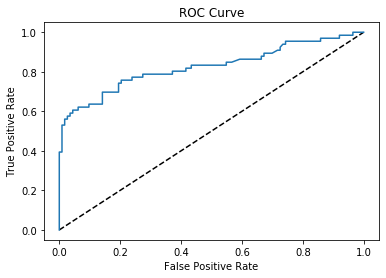

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal)

import matplotlib.pyplot as plt
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [32]:
print('AUC Değeri : ', roc_auc_score(y_test, tahmin_test_ihtimal))

AUC Değeri :  0.8244837758112095


**3. Hassasiyet/Duyarlılık Eğrisi**

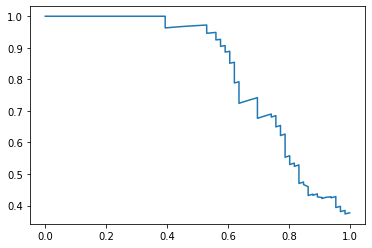

In [33]:
from sklearn.metrics import precision_recall_curve
hassasiyet, duyarlılık, _ = precision_recall_curve(y_test, tahmin_test_ihtimal)

plt.plot(duyarlılık, hassasiyet)
plt.show()

**4. Logaritmik Kayıp (Logarithmic Loss)**

In [34]:
from sklearn.metrics import log_loss

print("Logartimik Kayıp (log-loss) : " , log_loss(y_test, tahmin_test_ihtimal))
print("Hata Oranı                  : " , 1- accuracy_score(y_test, tahmin_test))

Logartimik Kayıp (log-loss) :  0.4643560825384833
Hata Oranı                  :  0.22346368715083798


**Farklı c değerleri için Roc-Curve**

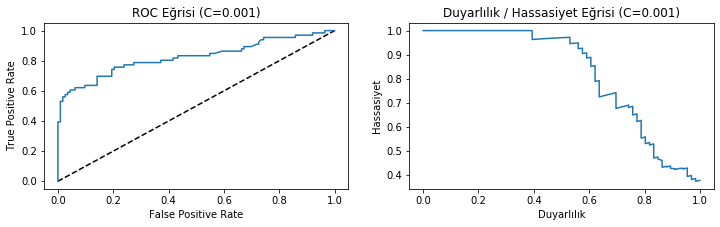

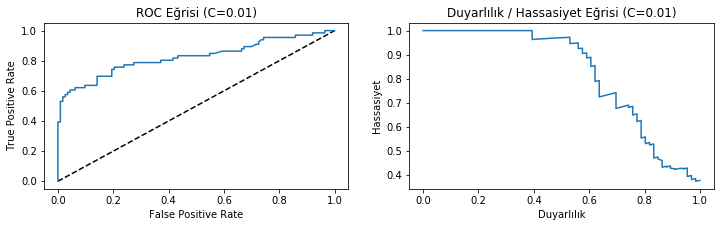

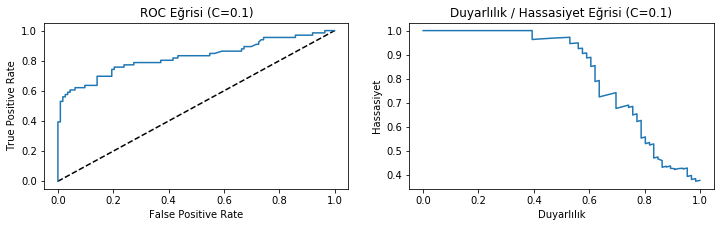

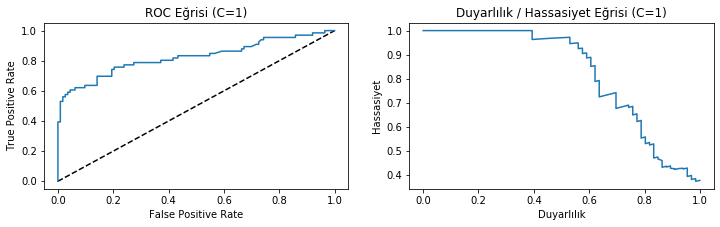

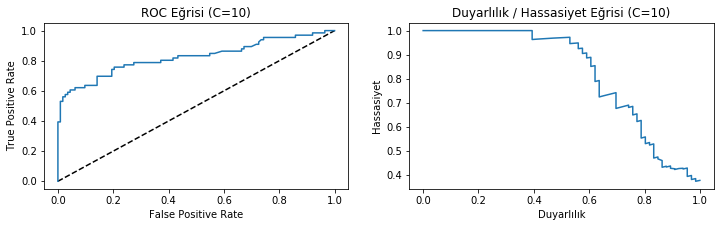

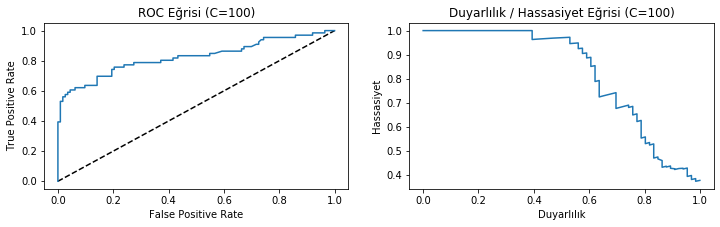

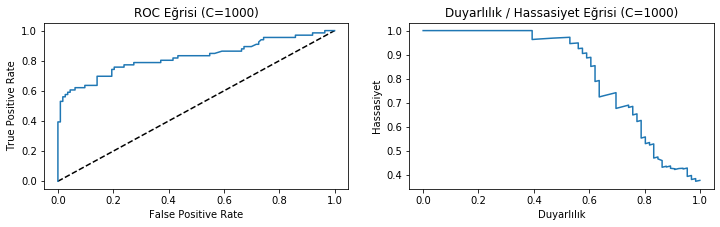

In [35]:
C_degerleri = [0.001,0.01,0.1,1,10,100, 1000]
dogruluk_df = pd.DataFrame(columns = ['C_Değeri','Doğruluk'])
dogruluk_değerleri = pd.DataFrame(columns=['C Değeri', 'Eğitim Doğruluğu', 'Test Doğruluğu'])

counter = 1
for c in C_degerleri:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(C = c)
    lr.fit(X_eğitim,y_eğitim)
    
    #dogruluk_değerleri = dogruluk_değerleri.append({'C Değeri': c,
    #                                                'Eğitim Doğruluğu' : lr.score(X_eğitim, y_eğitim),
    #                                                'Test Doğruluğu': lr.score(X_test, y_test)
    #                                                }, ignore_index=True)
    
    tahmin_test_ihtimal = titanic_survived_tahmin_modeli.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds  = roc_curve(y_test, tahmin_test_ihtimal)
    
    hassasiyet, duyarlılık, _ = precision_recall_curve(y_test, tahmin_test_ihtimal)
    
    plt.figure(figsize=(12,25))
    plt.subplot(len(C_degerleri),2,counter)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Eğrisi (C={})'.format(c))
    
    plt.subplot(len(C_degerleri),2,counter+1)
    plt.plot(duyarlılık, hassasiyet)
    plt.xlabel('Duyarlılık')
    plt.ylabel('Hassasiyet')
    plt.title('Duyarlılık / Hassasiyet Eğrisi (C={})'.format(c))
    
    counter = counter+2
    
#display(dogruluk_değerleri) 